In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)

models = {'Ridge': ridge, 'Lasso': lasso, 'ElasticNet': elastic}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = {'R2': r2, 'MSE': mse}


In [6]:
results_df = pd.DataFrame(results).T
print("✅ Regularization Comparison:\n")
print(results_df)


✅ Regularization Comparison:

                  R2       MSE
Ridge       0.575855  0.555803
Lasso       0.531817  0.613512
ElasticNet  0.562656  0.573099


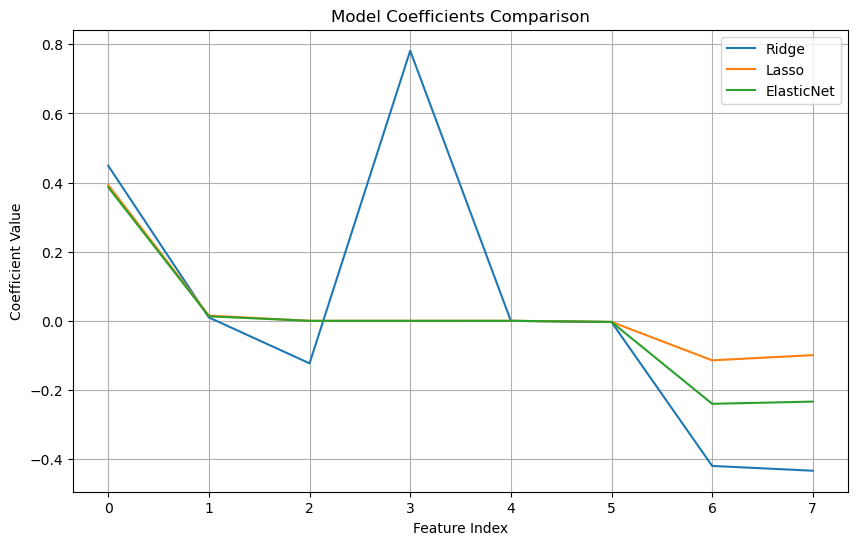

In [8]:
plt.figure(figsize=(10,6))
for name, model in models.items():
    plt.plot(model.coef_, label=name)

plt.legend()
plt.title("Model Coefficients Comparison")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.show()
